<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-151/blob/main/Reto/Reto_entrega2_equipo151.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alumnos:
Daniel López Aguilar A01121284
Jesús Christopher López González A01201236

Maestra:
María de la Paz Rico Fernández

Materia:
Ciencia y analítica de datos (Gpo 10)

Entrega:
Reto-> Entrega 2 -> Clasificación-ensambles y presentación ejecutiva

Fecha:
18-11-2022

Dataset:
AGUAS SUPERFICIALES 2022

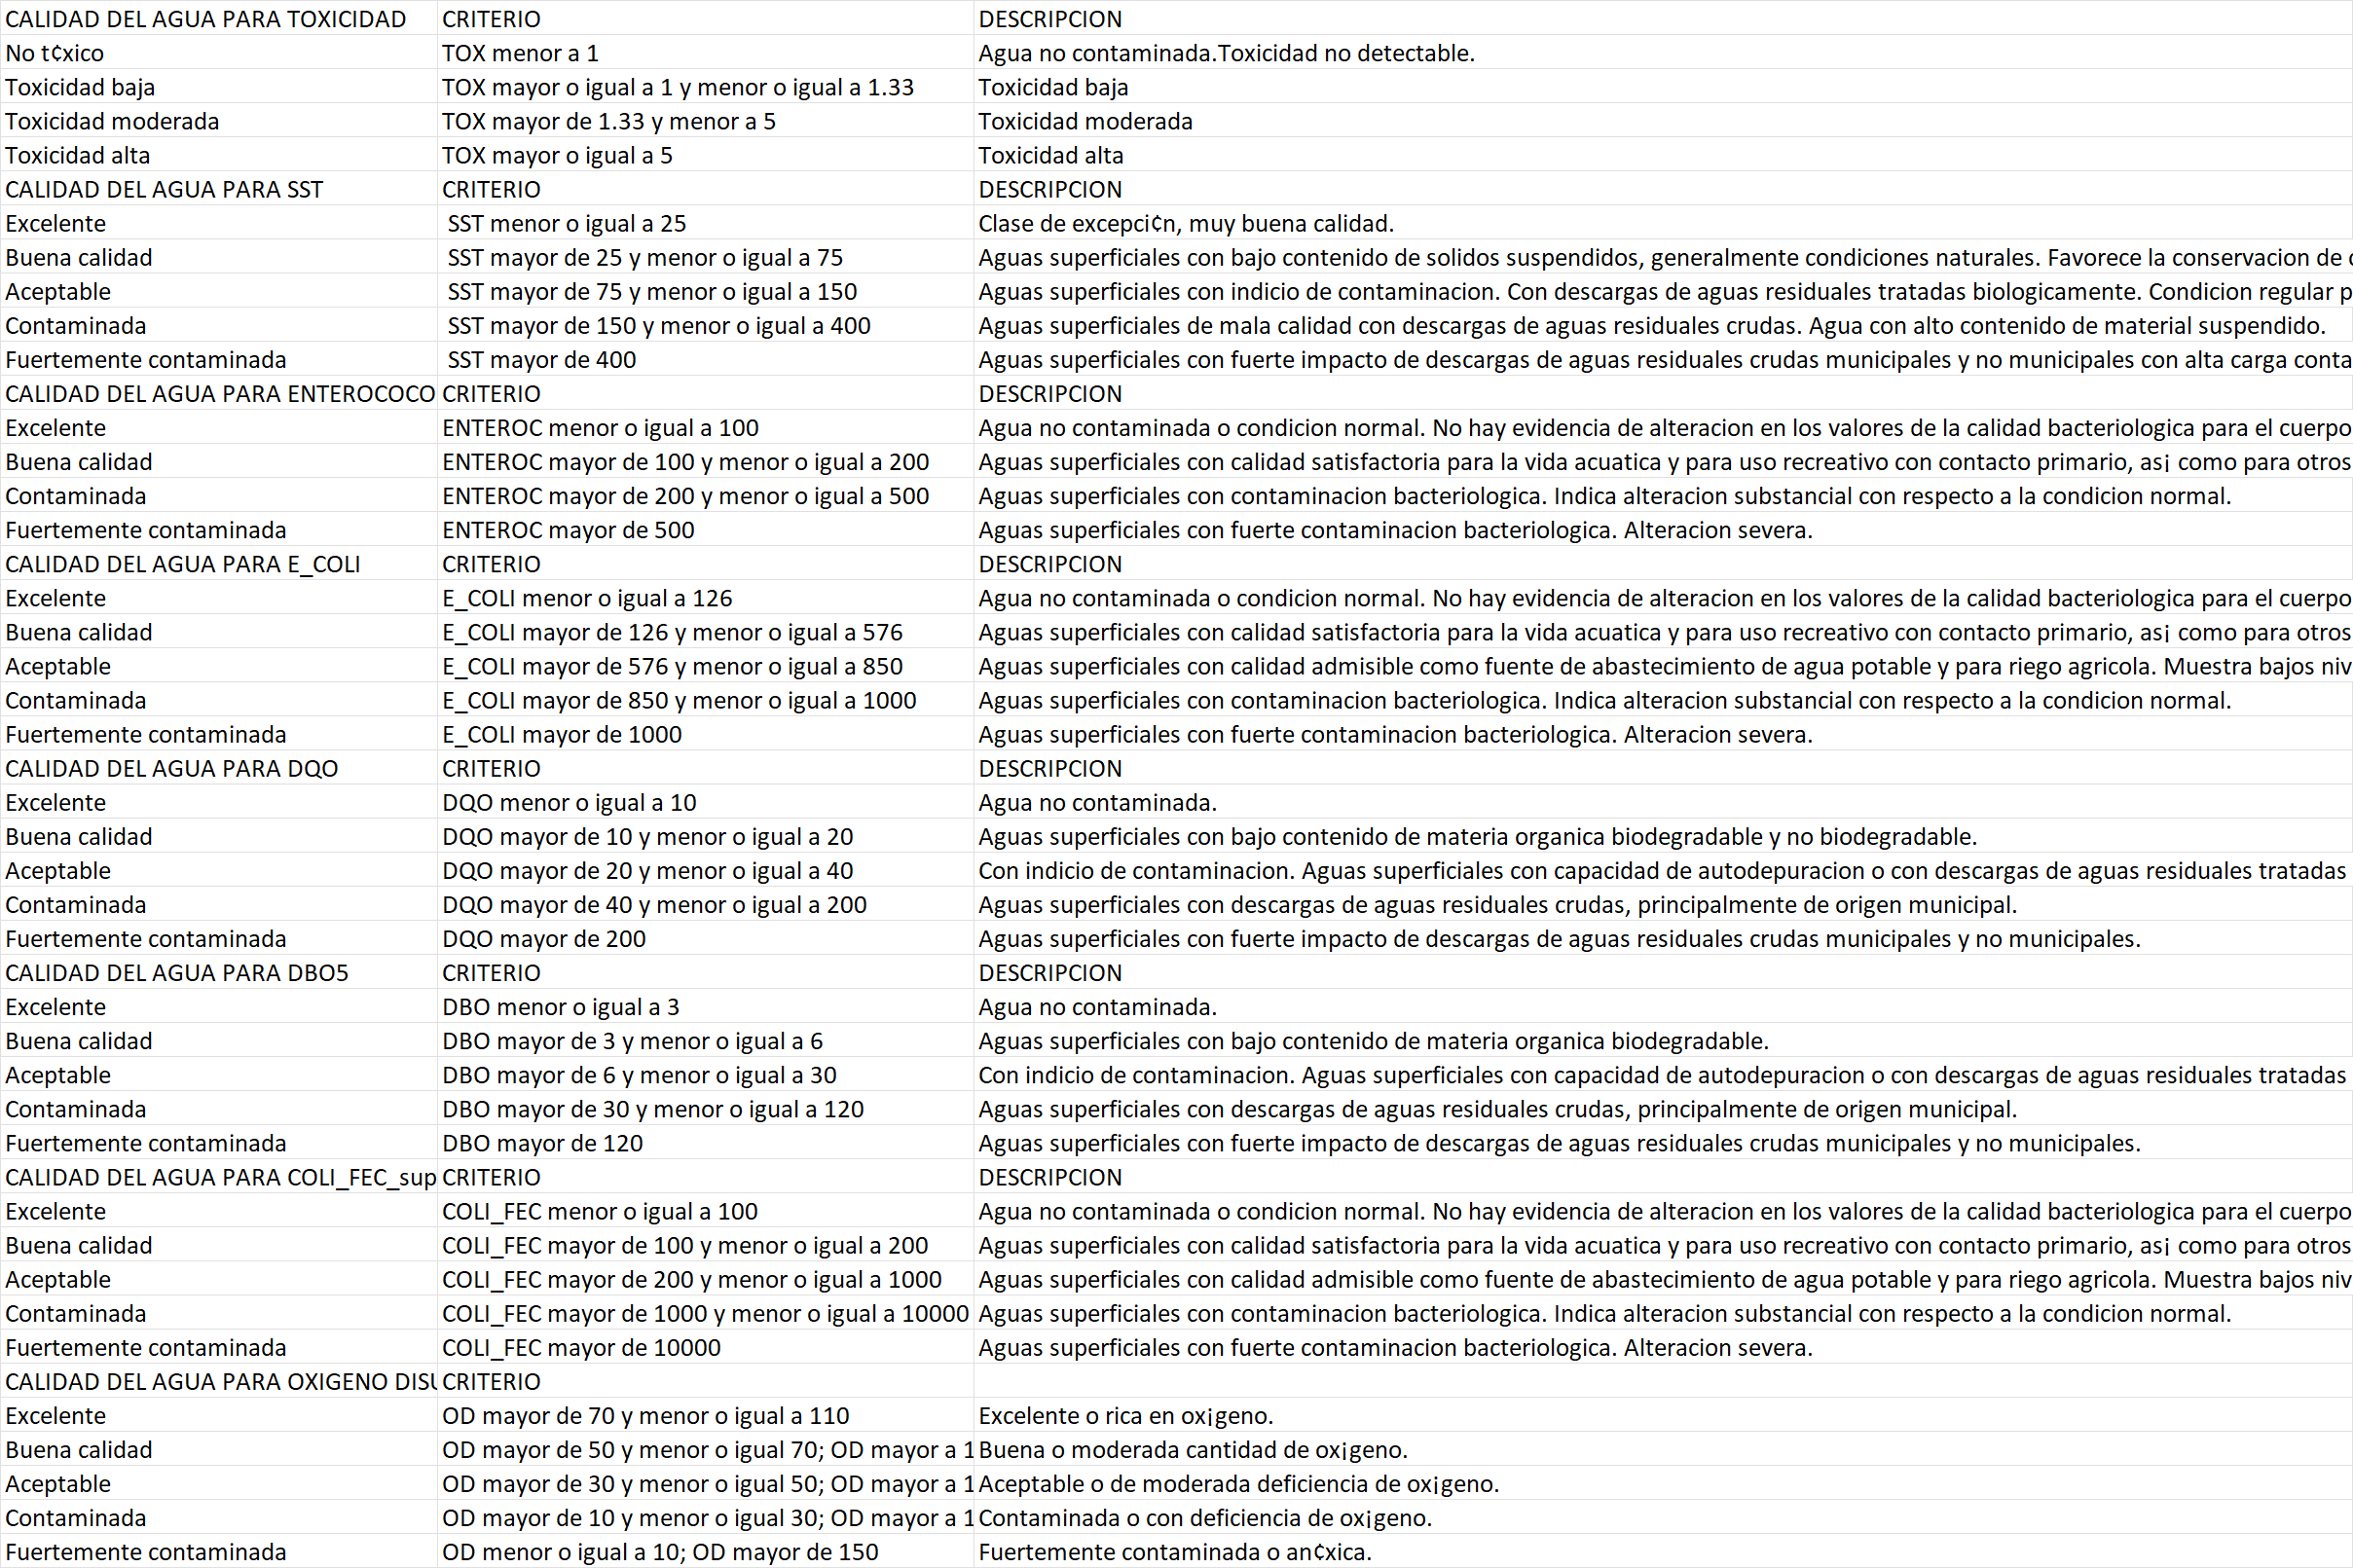

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz

In [ ]:
data="Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv"
dataset= pd.read_csv(data, encoding = "ISO-8859-1")

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   int64  
 12  DBO_mg/L                2581 non-null   object 
 13  CALIDAD_DBO             2581 non-null   object 
 14  DQO_mg/L                2581 non-null   

In [ ]:
print(dataset['CUMPLE_CON_DBO'].value_counts())
print(dataset['CUMPLE_CON_DBO'].count())

SI    2319
ND     912
NO     262
Name: CUMPLE_CON_DBO, dtype: int64
3493


In [ ]:
print(dataset['CONTAMINANTES'].value_counts())
print(dataset['CONTAMINANTES'].count())

CF,E_COLI,                  439
CF,                         354
DQO,                        191
DQO,CF,E_COLI,              149
ENT_FEC,                    132
                           ... 
DBO,DQO,SST,OD%S,             1
DQO,CF,OD%F,                  1
DQO,CF,E_COLI,OD%M,OD%F,      1
CF,E_COLI,OD%S,OD%F,          1
DBO,DQO,CF,TOX_L,             1
Name: CONTAMINANTES, Length: 96, dtype: int64
2226


In [ ]:
print(dataset['CUMPLE_CON_DQO'].value_counts())
print(dataset['CUMPLE_CON_DQO'].count())

SI    1650
NO     931
ND     912
Name: CUMPLE_CON_DQO, dtype: int64
3493


In [ ]:
print(dataset['CUMPLE_CON_SST'].value_counts())
print(dataset['CUMPLE_CON_SST'].count())

SI    3104
NO     385
ND       4
Name: CUMPLE_CON_SST, dtype: int64
3493


In [ ]:
print(dataset['CUMPLE_CON_CF'].value_counts())
print(dataset['CUMPLE_CON_CF'].count())

NO    1634
SI     948
ND     911
Name: CUMPLE_CON_CF, dtype: int64
3493


In [ ]:
print(dataset['CUMPLE_CON_E_COLI'].value_counts())
print(dataset['CUMPLE_CON_E_COLI'].count())

SI    1453
NO    1129
ND     911
Name: CUMPLE_CON_E_COLI, dtype: int64
3493


In [ ]:
print(dataset['CUMPLE_CON_ENTEROC'].value_counts())
print(dataset['CUMPLE_CON_ENTEROC'].count())

ND    2589
SI     752
NO     152
Name: CUMPLE_CON_ENTEROC, dtype: int64
3493


In [ ]:
print(dataset['CUMPLE_CON_OD'].value_counts())
print(dataset['CUMPLE_CON_OD'].count())

SI    2958
NO     492
ND      43
Name: CUMPLE_CON_OD, dtype: int64
3493


In [ ]:
print(dataset['CUMPLE_CON_TOX'].value_counts())
print(dataset['CUMPLE_CON_TOX'].count())

SI    3411
NO      82
Name: CUMPLE_CON_TOX, dtype: int64
3493


In [ ]:
print(dataset['GRUPO'].value_counts())
print(dataset['GRUPO'].count())

LOTICO     1772
COSTERO     988
LENTICO     733
Name: GRUPO, dtype: int64
3493


In [ ]:
print(dataset['SEMAFORO'].value_counts())
print(dataset['SEMAFORO'].count())

Verde       1267
Amarillo    1135
Rojo        1091
Name: SEMAFORO, dtype: int64
3493


In [ ]:
print(dataset['SITIO'].value_counts())
print(dataset['SITIO'].count())

ANTES DE LA CONFLUENCIA CON EL RIO ATOYAC    3
PRESA DERIVADORA MORELOS                     2
RIO GUANAJUATO                               2
PRESA BENITO JUAREZ CORTINA                  2
EL PUENTE                                    2
                                            ..
RIO TECOLUTLA 1                              1
PRESA LA SOLEDAD                             1
RIO CAZONES 1                                1
LAZARO CARDENAS                              1
RIO BRAVO 8 (PASO DE LOS INDIOS)             1
Name: SITIO, Length: 3481, dtype: int64
3493


In [ ]:
print(dataset['ORGANISMO_DE_CUENCA'].value_counts())
print(dataset['ORGANISMO_DE_CUENCA'].count())

LERMA SANTIAGO PACIFICO         709
FRONTERA SUR                    362
PACIFICO SUR                    330
BALSAS                          329
GOLFO CENTRO                    323
GOLFO NORTE                     293
PACIFICO NORTE                  282
RIO BRAVO                       216
PENINSULA DE BAJA CALIFORNIA    211
PENINSULA DE YUCATAN            194
NOROESTE                        128
AGUAS DEL VALLE DE MEXICO        68
CUENCAS CENTRALES DEL NORTE      48
Name: ORGANISMO_DE_CUENCA, dtype: int64
3493


In [ ]:
print(dataset['ESTADO'].value_counts())
print(dataset['ESTADO'].count())

VERACRUZ DE IGNACIO DE LA LLAVE    326
JALISCO                            248
CHIAPAS                            221
OAXACA                             206
GUERRERO                           205
MICHOACAN DE OCAMPO                194
SINALOA                            177
TAMAULIPAS                         171
TABASCO                            139
SONORA                             137
NAYARIT                            131
QUINTANA ROO                       117
GUANAJUATO                         108
BAJA CALIFORNIA                    106
MEXICO                             104
NUEVO LEON                         101
BAJA CALIFORNIA SUR                 95
PUEBLA                              93
SAN LUIS POTOSI                     74
DURANGO                             71
MORELOS                             69
COLIMA                              66
CAMPECHE                            53
HIDALGO                             52
QUERETARO ARTEAGA                   43
COAHUILA DE ZARAGOZA     

In [ ]:
print(dataset['MUNICIPIO'].value_counts())
print(dataset['MUNICIPIO'].count())

ACAPULCO DE JUAREZ            60
BENITO JUAREZ                 42
CULIACAN                      36
TOMATLAN                      33
ENSENADA                      33
                              ..
CUENCAME                       1
RODEO                          1
SAN BERNARDO                   1
MARISCALA DE JUAREZ            1
HEROICA CIUDAD DE TLAXIACO     1
Name: MUNICIPIO, Length: 755, dtype: int64
3493


In [ ]:
print(dataset['CUENCA'].value_counts())
print(dataset['CUENCA'].count())

YUCATAN (RESTO DE RH 32)    101
RIO ALTO ATOYAC              80
RIO AMACUZAC                 73
RIO LERMA 7                  56
RIO LA ANTIGUA               49
                           ... 
RIO CUITZMALA                 1
ARROYO LOBATOS                1
SAN FRANCISCO                 1
PRESA CAZADERO                1
RIO LA COMPAÑIA               1
Name: CUENCA, Length: 521, dtype: int64
3492


In [ ]:
print(dataset['CUERPO DE AGUA'].value_counts())
print(dataset['CUERPO DE AGUA'].count())

OCEANO PACIFICO                139
RIO LERMA                       93
GOLFO DE MEXICO                 89
CUERPO DE AGUA DEL HUMEDAL      59
MAR CARIBE                      53
                              ... 
ARROYO CAPUENTE (LOS PESOS)      1
RIO XOPANAC                      1
RIO VALPARAISO                   1
PRESA LA ZACATECANA              1
EL LAGUITO                       1
Name: CUERPO DE AGUA, Length: 1067, dtype: int64
3479


In [ ]:
print(dataset['TIPO'].value_counts())
print(dataset['TIPO'].count())

LOTICO                         1263
COSTERO (HUMEDAL)               485
LENTICO (HUMEDAL)               482
COSTERO                         343
LOTICO (HUMEDAL)                335
LENTICO                         244
LOTICO - COSTERO (HUMEDAL)       68
LOTICO - COSTERO                 46
LENTICO - COSTERO (HUMEDAL)      45
LOTICO A - Tipo 5                28
LOTICO A - Tipo 3                26
LOTICO A - Tipo 9                23
LOTICO A - Tipo 1                22
LOTICO A - Tipo 10               18
LOTICO A - Tipo 4                13
LOTICO A - Tipo 8                11
LOTICO A - Tipo 7 (HUMEDAL)      10
LOTICO A - Tipo 2                 8
LENTICO - COSTERO                 8
LOTICO A - Tipo 6                 8
LOTICO A - Tipo 7                 4
LOTICO A - Tipo 2 (HUMEDAL)       2
LOTICO A - Tipo 6 (HUMEDAL)       1
Name: TIPO, dtype: int64
3493


In [ ]:
print(dataset['SUBTIPO'].value_counts())
print(dataset['SUBTIPO'].count())

RIO                             1478
PRESA                            452
LAGUNA                           328
OCEANO-MAR                       266
LAGO                             231
BAHIA                            217
ARROYO                           133
ESTERO                            80
DESCARGA                          67
CANAL                             64
ESTUARIO                          59
DREN                              36
MANGLAR                           13
MARISMA                           12
PrEsa                             11
MANANTIAL                         10
CIENEGA                            6
DESCARGA INDUSTRIAL                6
Arroyo                             2
SISTEMA DE RIEGO DE LA PRESA       1
DESCARGA MUNICIPAL                 1
EMBALSE ARTIFICIAL                 1
TRANSICION RIO-MAR                 1
CENOTE                             1
Canal                              1
Lago                               1
MAR                                1
N

In [ ]:
print(dataset['CALIDAD_DBO'].value_counts())
print(dataset['CALIDAD_DBO'].count())

Excelente                  1330
Aceptable                   672
Buena calidad               317
Contaminada                 201
Fuertemente contaminada      61
Name: CALIDAD_DBO, dtype: int64
2581


In [ ]:
print(dataset['CALIDAD_DQO'].value_counts())
print(dataset['CALIDAD_DQO'].count())

Contaminada                790
Aceptable                  635
Excelente                  562
Buena calidad              453
Fuertemente contaminada    141
Name: CALIDAD_DQO, dtype: int64
2581


In [ ]:
print(dataset['CALIDAD_SST'].value_counts())
print(dataset['CALIDAD_SST'].count())

Excelente                  1780
Buena calidad              1010
Aceptable                   314
Contaminada                 230
Fuertemente contaminada     155
Name: CALIDAD_SST, dtype: int64
3489


In [ ]:
print(dataset['CALIDAD_COLI_FEC'].value_counts())
print(dataset['CALIDAD_COLI_FEC'].count())

Fuertemente contaminada    891
Contaminada                743
Aceptable                  456
Excelente                  399
Buena calidad               93
Name: CALIDAD_COLI_FEC, dtype: int64
2582


In [ ]:
print(dataset['CALIDAD_E_COLI'].value_counts())
print(dataset['CALIDAD_E_COLI'].count())

Fuertemente contaminada    1054
Excelente                   970
Buena calidad               423
Contaminada                  75
Aceptable                    60
Name: CALIDAD_E_COLI, dtype: int64
2582


In [ ]:
print(dataset['CALIDAD_ENTEROC'].value_counts())
print(dataset['CALIDAD_ENTEROC'].count())

Excelente                  709
Fuertemente contaminada    111
Buena calidad               43
Contaminada                 41
Name: CALIDAD_ENTEROC, dtype: int64
904


In [ ]:
print(dataset['CALIDAD_OD_PORC'].value_counts())
print(dataset['CALIDAD_OD_PORC'].count())

Excelente                  769
Buena calidad              426
Aceptable                  304
Contaminada                180
Fuertemente contaminada    118
Name: CALIDAD_OD_PORC, dtype: int64
1797


In [ ]:
print(dataset['CALIDAD_OD_PORC_SUP'].value_counts())
print(dataset['CALIDAD_OD_PORC_SUP'].count())

Excelente                  853
Buena calidad              462
Aceptable                  201
Contaminada                 72
Fuertemente contaminada     31
Name: CALIDAD_OD_PORC_SUP, dtype: int64
1619


In [ ]:
print(dataset['CALIDAD_OD_PORC_MED'].value_counts())
print(dataset['CALIDAD_OD_PORC_MED'].count())

Excelente                  236
Buena calidad              138
Aceptable                   73
Contaminada                 26
Fuertemente contaminada     14
Name: CALIDAD_OD_PORC_MED, dtype: int64
487


In [ ]:
print(dataset['CALIDAD_OD_PORC_FON'].value_counts())
print(dataset['CALIDAD_OD_PORC_FON'].count())

Excelente                  409
Buena calidad              250
Aceptable                  168
Contaminada                 84
Fuertemente contaminada     35
Name: CALIDAD_OD_PORC_FON, dtype: int64
946


In [ ]:
print(dataset['CALIDAD_TOX_D_48'].value_counts())
print(dataset['CALIDAD_TOX_D_48'].count())

No Toxico             1729
Toxicidad moderada      52
Toxicidad baja          31
Toxicidad alta           4
Name: CALIDAD_TOX_D_48, dtype: int64
1816


In [ ]:
print(dataset['CALIDAD_TOX_V_15'].value_counts())
print(dataset['CALIDAD_TOX_V_15'].count())

No Toxico             1671
Toxicidad alta          73
Toxicidad moderada      65
Toxicidad baja          10
Name: CALIDAD_TOX_V_15, dtype: int64
1819


In [ ]:
print(dataset['CALIDAD TOX_D_48_SUP'].value_counts())
print(dataset['CALIDAD TOX_D_48_SUP'].count())

No Toxico             738
Toxicidad baja         15
Toxicidad moderada      7
Toxicidad alta          2
Name: CALIDAD TOX_D_48_SUP, dtype: int64
762


In [ ]:
print(dataset['CALIDAD_TOX_FIS_SUP_15'].value_counts())
print(dataset['CALIDAD_TOX_FIS_SUP_15'].count())

No Toxico             1657
Toxicidad moderada      12
Toxicidad alta           4
Toxicidad baja           1
Name: CALIDAD_TOX_FIS_SUP_15, dtype: int64
1674


In [ ]:
dataset['SUBTIPO'] = dataset['SUBTIPO'].fillna('Cero')

In [ ]:
dataset['SUBTIPO'].head()

0         PRESA
1    OCEANO-MAR
2    OCEANO-MAR
3         BAHIA
4         BAHIA
Name: SUBTIPO, dtype: object

## MAPPING

In [ ]:
d = {'Verde': 0, 'Amarillo': 1, 'Rojo': 2}
dataset['SEMAFORO_'] = dataset['SEMAFORO'].map(d)
d = {'LERMA SANTIAGO PACIFICO': 0, 'FRONTERA SUR': 1, 'PACIFICO SUR': 2,'BALSAS': 3, 'GOLFO CENTRO': 4, 'GOLFO NORTE': 5, 'PACIFICO NORTE': 6, 'RIO BRAVO': 7, 'PENINSULA DE BAJA CALIFORNIA': 8, 'PENINSULA DE YUCATAN': 9, 'NOROESTE': 10, 'AGUAS DEL VALLE DE MEXICO': 11, 'CUENCAS CENTRALES DEL NORTE': 12}
dataset['ORGANISMO_DE_CUENCA_'] = dataset['ORGANISMO_DE_CUENCA'].map(d)
d = {'RIO': 0, 'PRESA': 1, 'LAGUNA': 2,'OCEANO-MAR': 3, 'LAGO': 4, 'BAHIA': 5, 'ARROYO': 6, 'ESTERO': 7, 'DESCARGA': 8, 'CANAL': 9, 'ESTUARIO': 10, 'DREN': 11, 'MANGLAR': 12, 'MARISMA': 13, 'PrEsa': 14, 'MANANTIAL': 15, 'CIENEGA': 16, 'DESCARGA INDUSTRIAL': 17, 'Arroyo': 18, 'SISTEMA DE RIEGO DE LA PRESA': 19, 'DESCARGA MUNICIPAL': 20, 'EMBALSE ARTIFICIAL': 21, 'TRANSICION RIO-MAR': 22, 'CENOTE': 23, 'Canal': 24, 'Lago': 25, 'MAR': 26, 'Cero': 27}
dataset['SUBTIPO_'] = dataset['SUBTIPO'].map(d)
d = {'LOTICO': 0, 'COSTERO': 1, 'LENTICO': 2}
dataset['GRUPO_'] = dataset['GRUPO'].map(d)
d = {'SI': 0, 'NO': 1, 'ND': 2}
dataset['CUMPLE_CON_DBO_'] = dataset['CUMPLE_CON_DBO'].map(d)
d = {'SI': 0, 'NO': 1, 'ND': 2}
dataset['CUMPLE_CON_DQO_'] = dataset['CUMPLE_CON_DQO'].map(d)
d = {'SI': 0, 'NO': 1, 'ND': 2}
dataset['CUMPLE_CON_SST_'] = dataset['CUMPLE_CON_SST'].map(d)
d = {'SI': 0, 'NO': 1, 'ND': 2}
dataset['CUMPLE_CON_CF_'] = dataset['CUMPLE_CON_CF'].map(d)
d = {'SI': 0, 'NO': 1, 'ND': 2}
dataset['CUMPLE_CON_E_COLI_'] = dataset['CUMPLE_CON_E_COLI'].map(d)
d = {'SI': 0, 'NO': 1, 'ND': 2}
dataset['CUMPLE_CON_ENTEROC_'] = dataset['CUMPLE_CON_ENTEROC'].map(d)
d = {'SI': 0, 'NO': 1, 'ND': 2}
dataset['CUMPLE_CON_OD_'] = dataset['CUMPLE_CON_OD'].map(d)
d = {'SI': 0, 'NO': 1, 'ND': 2}
dataset['CUMPLE_CON_TOX_'] = dataset['CUMPLE_CON_TOX'].map(d)

In [ ]:
dataset1 = dataset[['SEMAFORO_', 'ORGANISMO_DE_CUENCA_', 'SUBTIPO_', 'LONGITUD', 'LATITUD', 'CUMPLE_CON_DBO_', 'CUMPLE_CON_DQO_', 'CUMPLE_CON_SST_', 'CUMPLE_CON_CF_', 'CUMPLE_CON_E_COLI_', 'CUMPLE_CON_ENTEROC_', 'CUMPLE_CON_OD_', 'CUMPLE_CON_TOX_', 'GRUPO_']]

In [ ]:
X= dataset1.drop(columns = 'SEMAFORO_')
y= dataset1.drop(columns = ['ORGANISMO_DE_CUENCA_', 'SUBTIPO_', 'LONGITUD', 'LATITUD', 'CUMPLE_CON_DBO_', 'CUMPLE_CON_DQO_', 'CUMPLE_CON_SST_', 'CUMPLE_CON_CF_', 'CUMPLE_CON_E_COLI_', 'CUMPLE_CON_ENTEROC_', 'CUMPLE_CON_OD_', 'CUMPLE_CON_TOX_', 'GRUPO_'])

## DATA SPLIT

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)
RF = RandomForestClassifier(random_state=42)
DT = DecisionTreeClassifier(random_state=42)

## DECISION TREE

In [ ]:
param2 = {
    'criterion': ['entropy'],
    'splitter': ['random'],
    'max_depth':[10],
    'min_samples_leaf':[1],
    'random_state' : [21]
    }

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
search = GridSearchCV(DT, param2, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

result = search.fit(X_train, Y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.0020458347273335565
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'random_state': 21, 'splitter': 'random'}


In [ ]:
DT2 = DecisionTreeClassifier(criterion = 'entropy', splitter = 'random', max_depth = 10, min_samples_leaf = 1, random_state=42)
DT2.fit(X_train, Y_train)
print("DECISION SCORE:", DT2.score(X_test, Y_test))

DECISION SCORE: 0.9971374045801527


In [ ]:
DT2.feature_importances_

array([0.00695266, 0.        , 0.00663253, 0.00771975, 0.00511157,
       0.56957125, 0.01884504, 0.201886  , 0.00827181, 0.0894475 ,
       0.07904013, 0.00652177, 0.        ])

<BarContainer object of 13 artists>

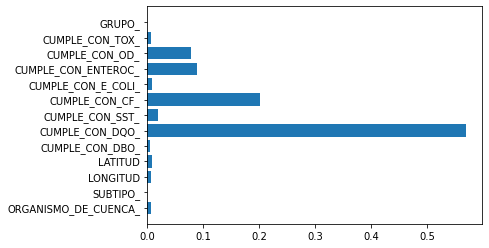

In [ ]:
plt.barh(X.columns, DT2.feature_importances_)

In [ ]:
y_true = Y_test
y_pred = DT2.predict(X_test)
target_names = ['Verde', 'Amarillo', 'Rojo']
confusion_matrix(Y_test, y_pred)

array([[409,   0,   0],
       [  1, 343,   0],
       [  0,   2, 293]])

In [ ]:
y_true = Y_test
y_pred = DT2.predict(X_test)
target_names = ['Verde', 'Amarillo', 'Rojo']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Verde       1.00      1.00      1.00       409
    Amarillo       0.99      1.00      1.00       344
        Rojo       1.00      0.99      1.00       295

    accuracy                           1.00      1048
   macro avg       1.00      1.00      1.00      1048
weighted avg       1.00      1.00      1.00      1048



In [ ]:
export_graphviz(
        DT2,
        out_file=str("aguas_tree.dot"),  # path differs in the book
        feature_names= X.columns,
        class_names= ['Rojo', 'Amarillo', 'Verde'],
        rounded=True,
        filled=True
    )

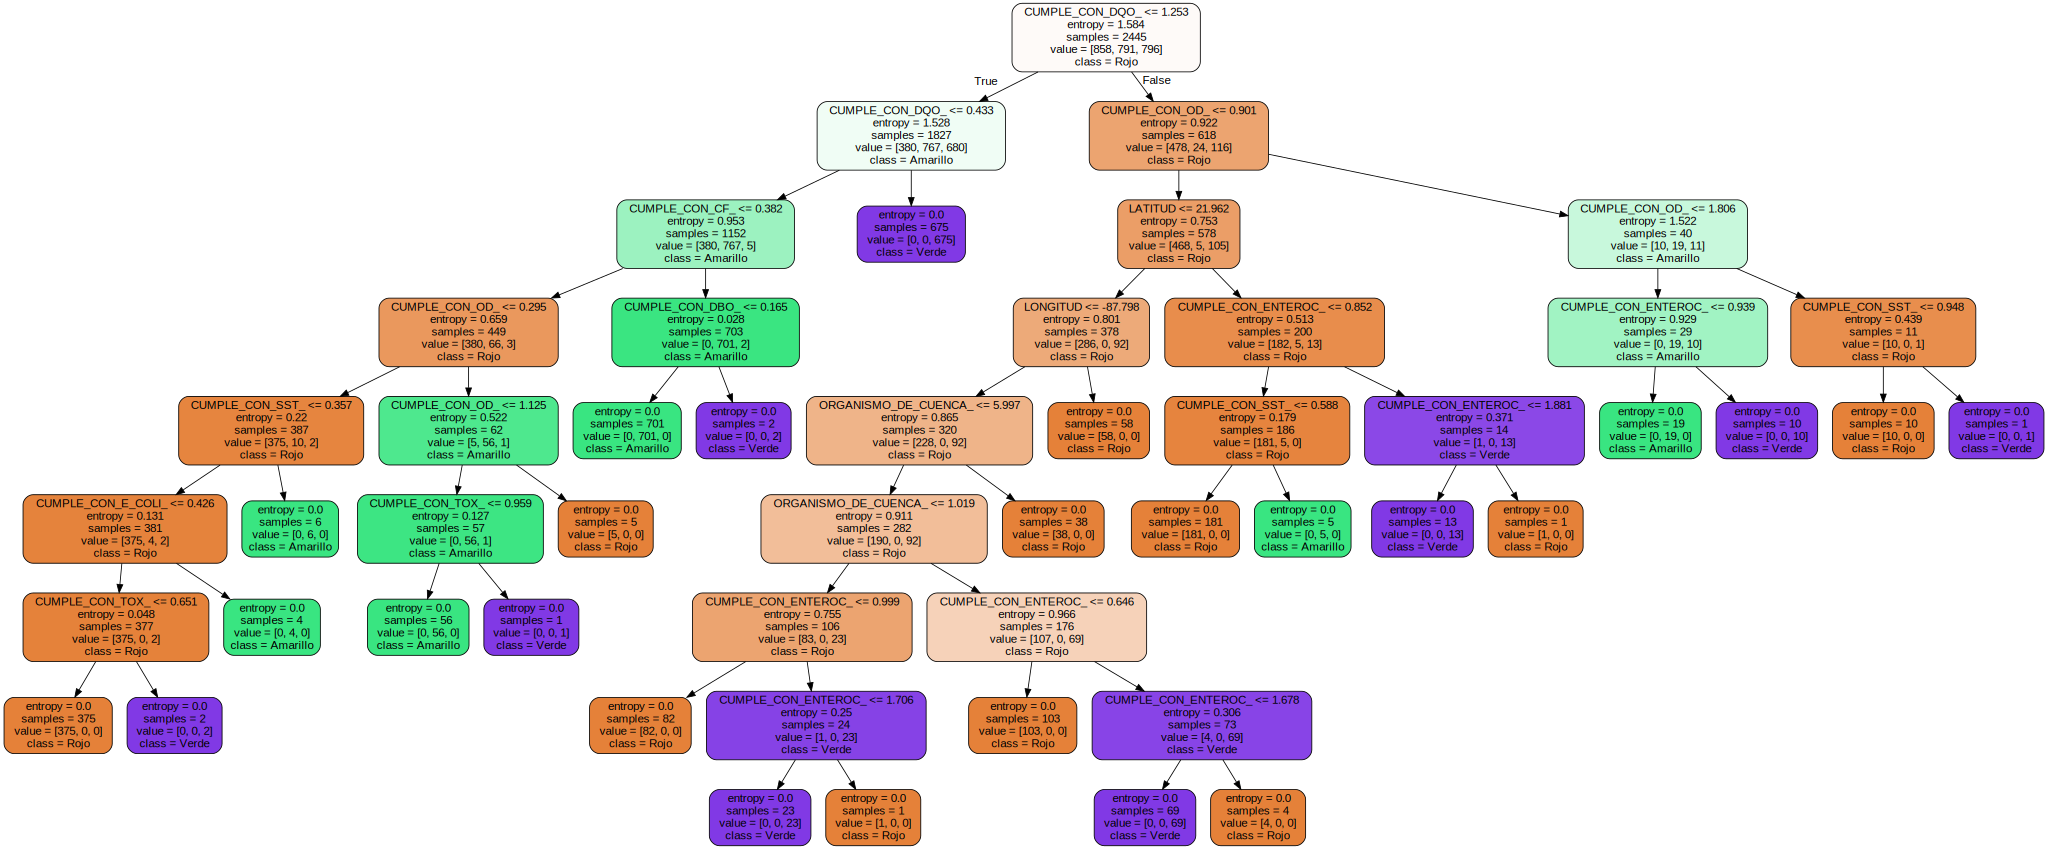

In [ ]:
from graphviz import Source

Source.from_file("aguas_tree.dot")  # path differs in the book

## RANDOM FOREST

In [ ]:
param = {
    'n_estimators':[40],
    'criterion': ['gini'],
    'max_depth':[25],
    'min_samples_leaf':[1],
    'bootstrap':[True]
    }

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
search = GridSearchCV(RF, param, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

result = search.fit(X_train, Y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.006268540202966433
Best Hyperparameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 1, 'n_estimators': 40}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [ ]:
RF2 = RandomForestClassifier(n_estimators = 40, criterion ='gini', max_depth = 25, min_samples_leaf = 1, bootstrap = True, random_state=42)

In [ ]:
RF2.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(max_depth=25, n_estimators=40, random_state=42)

In [ ]:
RF2.fit(X_train, Y_train)
print("RANDOM FOREST SCORE:", RF2.score(X_test, Y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RANDOM FOREST SCORE: 0.9942748091603053


In [ ]:
RF2.feature_importances_

array([0.01992277, 0.01781906, 0.03361502, 0.03303227, 0.08498115,
       0.35103949, 0.01587244, 0.19810582, 0.05954029, 0.11166202,
       0.05299957, 0.00288694, 0.01852315])

<BarContainer object of 13 artists>

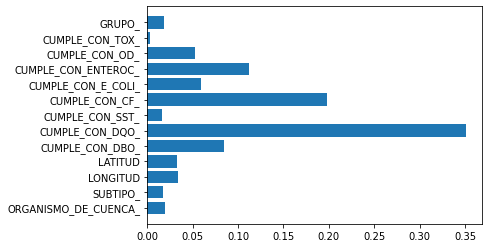

In [ ]:
plt.barh(X.columns, RF2.feature_importances_)

In [ ]:
y_true = Y_test
y_pred = RF2.predict(X_test)
target_names = ['Verde', 'Amarillo', 'Rojo']
confusion_matrix(Y_test, y_pred)

array([[409,   0,   0],
       [  4, 340,   0],
       [  0,   2, 293]])

In [ ]:
y_true = Y_test
y_pred = RF2.predict(X_test)
target_names = ['Verde', 'Amarillo', 'Rojo']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Verde       0.99      1.00      1.00       409
    Amarillo       0.99      0.99      0.99       344
        Rojo       1.00      0.99      1.00       295

    accuracy                           0.99      1048
   macro avg       0.99      0.99      0.99      1048
weighted avg       0.99      0.99      0.99      1048



## CONCLUSION

Conclusión: Recomendamos usar nuestro decision tree debido a que el performance es muy similar a random forest. A pesar de que pudiera llegar a generar un posible overfit, es un modelo mas simple, menos costoso y fácil de explicar.